### Environment

In [4]:
import os
import datetime
import pandas as pd
import numpy as np
from pathlib import Path

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
%matplotlib inline
init_notebook_mode(connected=True)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score
from sklearn.cross_validation import KFold
from sklearn.pipeline import make_pipeline

In [1]:
import keras
from keras.layers import Conv1D, Dropout, Dense
from keras.models import Sequential
from keras import regularizers
from keras import optimizers

Using TensorFlow backend.
/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [ ]:
import ipywidgets as widgets
from IPython.display import HTML

### Data Import & Framing

In [ ]:
#for now, will eventually be importing from the db 

df = read.csv('')

### Functions

## Time Series

### ARIMA

Text. <br><br>

<b> Key Highlights </b>: <br>
<br>
<i> Top Model Accuracy: </i>

In [ ]:
The first step towards fitting an ARIMA model is to find the values of ARIMA(p,d,q)(P,D,Q)s that produce 
the desired output. Selection of these parameters requires domain expertise and time. 
We shall first generate small ranges of these parameters and use a "grid search" to 
iteratively explore different combinations of parameters.
For each combination of parameters, we fit a new seasonal ARIMA model with the SARIMAX() 
function from the statsmodels module and assess its overall quality.

SARIMAX detailed documentation can be viewed HERE

Let's begin by generating example combination of parameters that we wish to use.

Define p,q and d parameters to take any value from 0/1 using range() function. 
(Note: We can try larger values which can make our model computationally expensive to run, 
 you can try this as an additional experiment)

Generate combinations for (p,d,q) using itertools.product.

Similarly, generate seasonal combinations as (p,d,q)s. Use s = 12 (constant)

Check the combinations for validity.

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets

### FB Prophet - Additive Modeling


<b> Key Highlights </b>: <br>
<br>
<i> Top Model Accuracy: </i>

In [5]:
from fbprophet import Prophet
from sklearn.preprocessing import MinMaxScaler

In [31]:
data = pd.read_csv('eth_hourly_data.csv')
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True, drop=True)
data['ds'] = data['time'].apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%dT%H:%M:%S'))
data['y'] = data['close']
data = data[::-1]
data.reset_index(inplace = True, drop = True)
data.drop(columns=['time', 'high', 'low', 'open', 'close', 'volumeto', 'volumefrom'], inplace=True)

In [32]:
data.head()

,ds,y
0,2017-02-25T23:00:00,13.64
1,2017-02-26T00:00:00,13.53
2,2017-02-26T01:00:00,13.49
3,2017-02-26T02:00:00,13.41
4,2017-02-26T03:00:00,13.49


In [63]:
proph = Prophet(interval_width=.95)
proph.fit(data)


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/anaconda3/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [64]:
future = proph.make_future_dataframe(freq = "H", periods=72)
future.tail(3)

,ds
13894,2018-09-27 21:00:00
13895,2018-09-27 22:00:00
13896,2018-09-27 23:00:00


In [65]:
forecast = proph.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)

,ds,yhat,yhat_lower,yhat_upper
13894,2018-09-27 21:00:00,0.120181,0.049505,0.193423
13895,2018-09-27 22:00:00,0.120251,0.050038,0.190809
13896,2018-09-27 23:00:00,0.120359,0.042361,0.191446


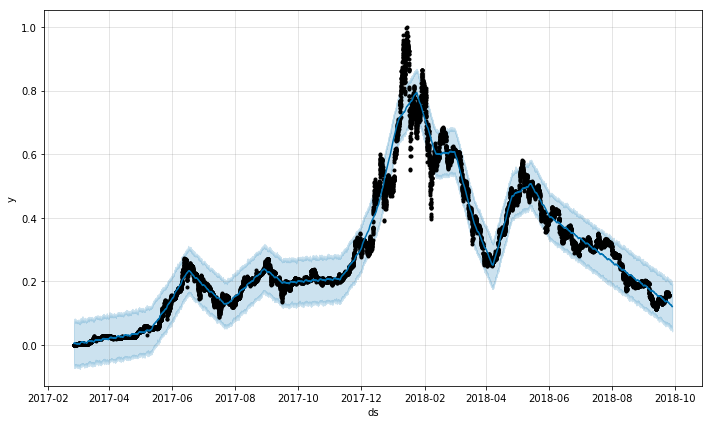

In [66]:
fig1 = proph.plot(forecast)


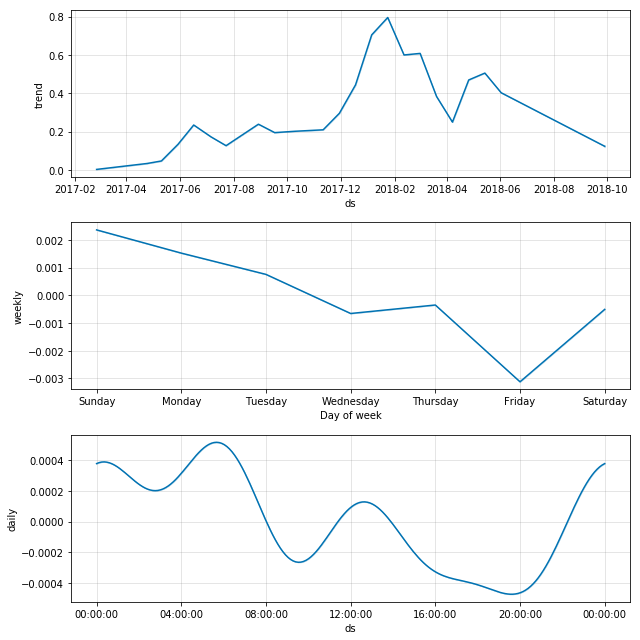

In [67]:
fig2 = proph.plot_components(forecast)

In [68]:
prediction_table = pd.DataFrame()
prediction_table['time'] = forecast.ds.iloc[-96:]
prediction_table['predicted_close'] =forecast.yhat.iloc[-96:]
prediction_table.head(5)

,time,predicted_close
13801,2018-09-24 00:00:00,0.134461
13802,2018-09-24 01:00:00,0.134328
13803,2018-09-24 02:00:00,0.134109
13804,2018-09-24 03:00:00,0.133964
13805,2018-09-24 04:00:00,0.133966


In [69]:
forecast.loc[13801]

ds                            2018-09-24 00:00:00
trend                                    0.132562
trend_lower                              0.132562
trend_upper                              0.132562
yhat_lower                              0.0689608
yhat_upper                               0.207547
additive_terms                         0.00189979
additive_terms_lower                   0.00189979
additive_terms_upper                   0.00189979
daily                                 0.000377389
daily_lower                           0.000377389
daily_upper                           0.000377389
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
weekly                                  0.0015224
weekly_lower                            0.0015224
weekly_upper                            0.0015224
yhat                                     0.134461
Name: 13801, dtype: object

In [70]:
data.loc[13801]

ds    2018-09-24T00:00:00
y                0.163199
Name: 13801, dtype: object

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/anaconda3/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



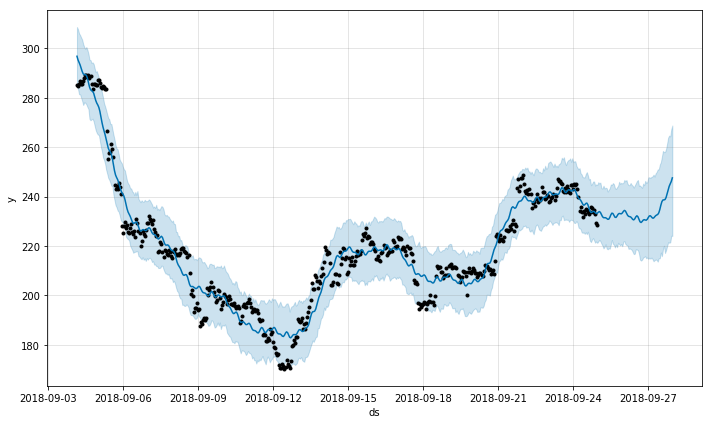

In [45]:
proph2 = Prophet(interval_width=.95)
proph2.fit(data.iloc[-500:])
future2 = proph2.make_future_dataframe(freq="H", periods=72)
forecast2 = proph2.predict(future2)
fig1_2 = proph2.plot(forecast2)

In [47]:
prediction_table2 = pd.DataFrame()
prediction_table2['time'] = forecast2.ds.iloc[-96:]
prediction_table2['predicted_close'] =forecast2.yhat.iloc[-96:]
prediction_table2.head()

,time,predicted_close
476,2018-09-24 00:00:00,242.737288
477,2018-09-24 01:00:00,242.898455
478,2018-09-24 02:00:00,242.401339
479,2018-09-24 03:00:00,241.322424
480,2018-09-24 04:00:00,240.171933


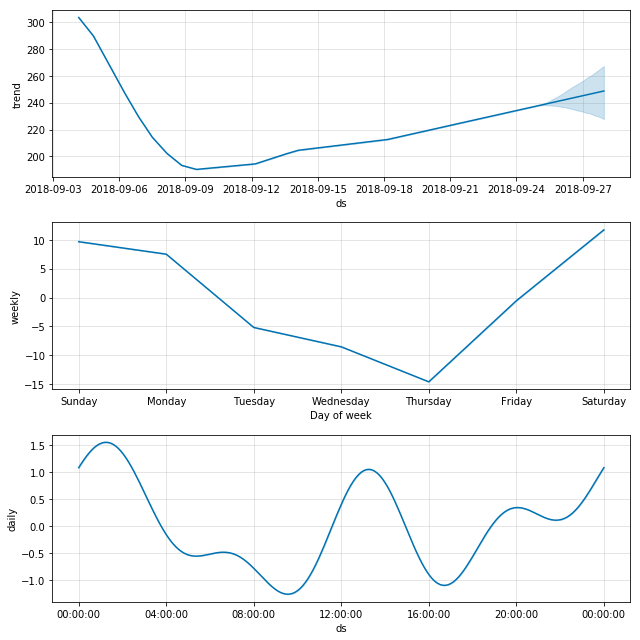

In [48]:
fig2_2 = proph2.plot_components(forecast2)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/anaconda3/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



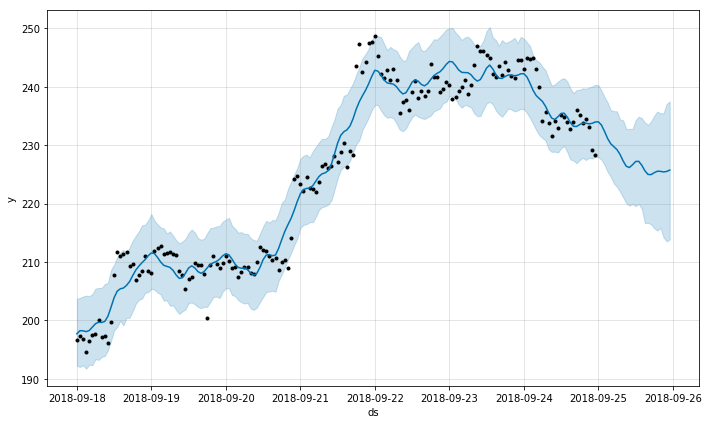

In [49]:
proph4 = Prophet(interval_width=.95)
proph4.fit(data.iloc[-168:])
future4 = proph4.make_future_dataframe(freq="H", periods=24)
forecast4 = proph4.predict(future4)
fig1_4 = proph4.plot(forecast4)

In [51]:
prediction_table4 = pd.DataFrame()
prediction_table4['time'] = forecast4.ds.iloc[-48:]
prediction_table4['predicted_close'] =forecast4.yhat.iloc[-48:]
prediction_table4.head()

,time,predicted_close
144,2018-09-24 00:00:00,242.233634
145,2018-09-24 01:00:00,241.684900
146,2018-09-24 02:00:00,240.584862
147,2018-09-24 03:00:00,239.364723
148,2018-09-24 04:00:00,238.473269


In [52]:
scaler = MinMaxScaler()
scaler.fit(np.array(data['y']).reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [53]:
scaler.data_max_

array([1420.77])

In [54]:
new_y = scaler.transform(np.array(data['y']).reshape(-1,1))
data['y'] = new_y

In [55]:
data.max()

ds    2018-09-24T23:00:00
y                       1
dtype: object

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/anaconda3/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



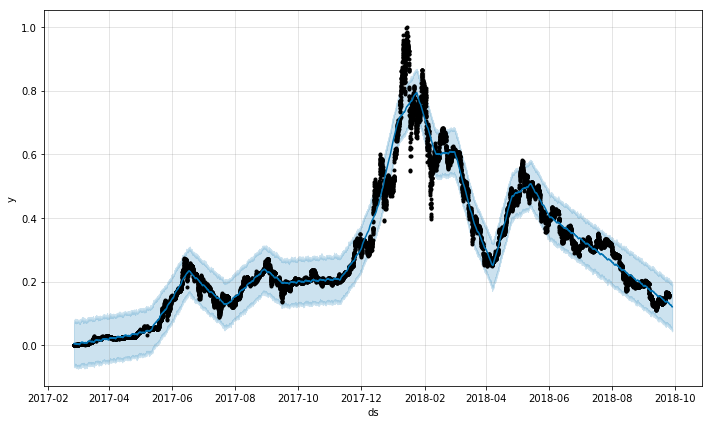

In [58]:
proph3 = Prophet(interval_width=.95)
proph3.fit(data)
future3 = proph3.make_future_dataframe(freq = 'H', periods=72)
forecast3 = proph3.predict(future3)
fig1_3 = proph3.plot(forecast3)

In [59]:
predications3 = forecast3.yhat.iloc[-72:]
prediction_table3 = pd.DataFrame()
prediction_table3['time'] = forecast3.ds.iloc[-72:]
prediction_table3['predicted_close'] = scaler.inverse_transform(np.array(predications3).reshape(-1,1))
prediction_table3.head()

,time,predicted_close
13825,2018-09-25 00:00:00,198.235040
13826,2018-09-25 01:00:00,197.950226
13827,2018-09-25 02:00:00,197.537086
13828,2018-09-25 03:00:00,197.225248
13829,2018-09-25 04:00:00,197.115693


In [61]:
forecast3.tail(10)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yhat
13887,2018-09-27 14:00:00,0.124082,0.117328,0.125596,0.045154,0.192224,-0.001993,-0.001993,-0.001993,-0.000018,-0.000018,-0.000018,0.0,0.0,0.0,-0.001975,-0.001975,-0.001975,0.122089
13888,2018-09-27 15:00:00,0.123983,0.117092,0.125562,0.048327,0.188883,-0.002320,-0.002320,-0.002320,-0.000202,-0.000202,-0.000202,0.0,0.0,0.0,-0.002119,-0.002119,-0.002119,0.121663
13889,2018-09-27 16:00:00,0.123885,0.116856,0.125643,0.047763,0.191655,-0.002585,-0.002585,-0.002585,-0.000326,-0.000326,-0.000326,0.0,0.0,0.0,-0.002259,-0.002259,-0.002259,0.121300
13890,2018-09-27 17:00:00,0.123786,0.116620,0.125730,0.048121,0.196151,-0.002772,-0.002772,-0.002772,-0.000377,-0.000377,-0.000377,0.0,0.0,0.0,-0.002395,-0.002395,-0.002395,0.121014
13891,2018-09-27 18:00:00,0.123688,0.116384,0.125695,0.047713,0.192330,-0.002937,-0.002937,-0.002937,-0.000411,-0.000411,-0.000411,0.0,0.0,0.0,-0.002526,-0.002526,-0.002526,0.120751
13892,2018-09-27 19:00:00,0.123589,0.116148,0.125657,0.046224,0.196806,-0.003108,-0.003108,-0.003108,-0.000458,-0.000458,-0.000458,0.0,0.0,0.0,-0.002650,-0.002650,-0.002650,0.120481
13893,2018-09-27 20:00:00,0.123490,0.115912,0.125655,0.043355,0.191910,-0.003229,-0.003229,-0.003229,-0.000463,-0.000463,-0.000463,0.0,0.0,0.0,-0.002766,-0.002766,-0.002766,0.120262
13894,2018-09-27 21:00:00,0.123392,0.115676,0.125731,0.051542,0.187427,-0.003210,-0.003210,-0.003210,-0.000339,-0.000339,-0.000339,0.0,0.0,0.0,-0.002872,-0.002872,-0.002872,0.120181
13895,2018-09-27 22:00:00,0.123293,0.115456,0.125806,0.044440,0.193805,-0.003042,-0.003042,-0.003042,-0.000075,-0.000075,-0.000075,0.0,0.0,0.0,-0.002967,-0.002967,-0.002967,0.120251
13896,2018-09-27 23:00:00,0.123195,0.115237,0.125881,0.045077,0.187168,-0.002836,-0.002836,-0.002836,0.000215,0.000215,0.000215,0.0,0.0,0.0,-0.003051,-0.003051,-0.003051,0.120359


### Bayesian Ridge Regression

In [7]:
df = pd.read_csv('eth_hourly_data.csv')

In [8]:
df['time'] = df['time'].apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%dT%H:%M:%S'))
df.set_index(df['time'], inplace=True)
df.drop(['time'], axis=1, inplace=True)
df.drop(df.index[:1], inplace=True)
df = df[::-1]
df.drop(df.index[:1], inplace=True)

In [9]:
df.isna().sum()

close         0
high          0
low           0
open          0
volumefrom    0
volumeto      0
dtype: int64

In [10]:
#shift target variable one day back 
#in order to train model to predict one day into future
df['close_shifted'] = df['close'].shift(-1)
df = df.dropna()

In [11]:
df.head(3)

,close,high,low,open,volumefrom,volumeto,close_shifted
time,,,,,,,
2017-02-26T00:00:00,13.53,13.63,13.50,13.64,8964.52,121379.69,13.49
2017-02-26T01:00:00,13.49,13.58,13.47,13.53,7857.09,105979.54,13.41
2017-02-26T02:00:00,13.41,13.52,13.40,13.49,7045.66,94725.35,13.49


In [12]:
#make numpy arrays
# df['average'] = df['high'] + df['low'] / 2
# X = np.array(df['average'])
X = np.array(df[['close', 'high', 'low', 'open']])
y = np.array(df['close_shifted']).reshape(-1,1)

In [13]:
len(X) - 14349

72

In [14]:
# this uses a Bayesian Ridge linear regression 
# adapt this to other usage? With any regressor?
# customized backtest function
# compare with TimeSeriesSplit

n_days = 20

def backtest(n_days):
    """
    n_days - amount of the last n_days that we want to get prediction and calculate metrics
    """
    predictions = []
    true_values = []
    for i in reversed(range(1, n_days)):
        X_train = X[14349:len(X)-i]
        y_train = y[14349:len(y)-i]
        X_test = X[len(X)-i]
        y_test = y[len(y)-i]
        model = BayesianRidge()
        model.fit(X_train, y_train.ravel())
        predictions.append(model.predict([X_test])[0])
        true_values.append(y_test[0])
    return true_values, predictions


# def backtest(n_days):
#     """
#     n_days - amount of the last n_days that we want to get prediction and calculate metrics
#     """
#     predictions = []
#     true_values = []
#     for i in reversed(range(1, n_days)):
#         X_train = X[:len(X)-i]
#         y_train = y[:len(y)-i]
#         X_test = X[len(X)-i]
#         y_test = y[len(y)-i]
#         model = BayesianRidge()
#         model.fit(X_train, y_train.ravel())
#         predictions.append(model.predict([X_test])[0])
#         true_values.append(y_test[0])
#     return true_values, predictions
 
true_values, predictions = backtest(n_days)

In [15]:
len(true_values)

19

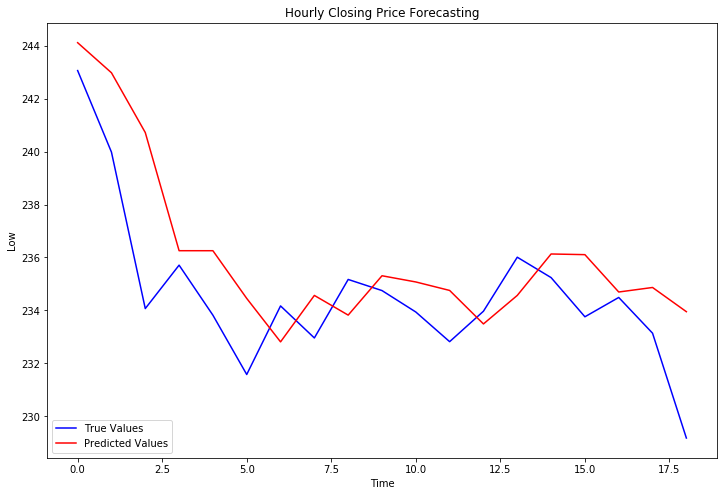

In [348]:
plt.figure(figsize=(12, 8))
# x_ax_vals = [df.index for i in reversed(range(1, n_days)):
#         X_train = X[14349:len(X)-i]]
plt.plot(true_values, color = 'blue', label = "True Values")
plt.plot(predictions, color = 'red', label = "Predicted Values")
plt.title ('Hourly Closing Price Forecasting')
plt.ylabel("Low")
plt.xlabel("Time")
plt.legend(loc="lower left")
# plt.errorbar(range(0,30), y_mean, y_std, color='gold',
#              label="Polynomial Bayesian Ridge Regression")

# X = np.linspace(0, 10, 100)
# y = f(X, noise_amount=0.1)
# clf_poly = BayesianRidge()
# clf_poly.fit(np.vander(X, degree), y)

# X_plot = np.linspace(0, 11, 25)
# y_plot = f(X_plot, noise_amount=0)
# y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)

# plt.errorbar(X_plot, y_mean, y_std, color='navy',
#              label="Polynomial Bayesian Ridge Regression", linewidth=lw)
# plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
#          label="Ground Truth")



Testing our sklearn TimeSeriesSplit 

In [17]:
from sklearn.model_selection import TimeSeriesSplit
X = np.array(df[['close', 'high', 'low', 'open']])
y = np.array(df['close_shifted']).reshape(-1,1)

tscv = TimeSeriesSplit(n_splits=5)
print(tscv)  

TimeSeriesSplit(max_train_size=None, n_splits=5)


In [18]:
TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [   0    1    2 ... 2403 2404 2405] TEST: [2406 2407 2408 ... 4806 4807 4808]
TRAIN: [   0    1    2 ... 4806 4807 4808] TEST: [4809 4810 4811 ... 7209 7210 7211]
TRAIN: [   0    1    2 ... 7209 7210 7211] TEST: [7212 7213 7214 ... 9612 9613 9614]
TRAIN: [   0    1    2 ... 9612 9613 9614] TEST: [ 9615  9616  9617 ... 12015 12016 12017]
TRAIN: [    0     1     2 ... 12015 12016 12017] TEST: [12018 12019 12020 ... 14418 14419 14420]


In [19]:
X_train

array([[ 13.53,  13.63,  13.5 ,  13.64],
       [ 13.49,  13.58,  13.47,  13.53],
       [ 13.41,  13.52,  13.4 ,  13.49],
       ...,
       [528.38, 531.48, 528.24, 530.4 ],
       [525.04, 529.28, 523.51, 528.38],
       [524.47, 525.91, 521.94, 525.04]])

In [20]:
len(X_train)

12018

In [21]:
X_test

array([[522.19, 525.19, 522.13, 524.47],
       [524.01, 524.82, 521.92, 522.19],
       [525.97, 527.19, 523.88, 524.01],
       ...,
       [233.76, 235.24, 233.47, 235.24],
       [234.49, 235.03, 233.61, 233.76],
       [233.14, 234.49, 232.35, 234.49]])

In [22]:
tts_predictions = []
tts_true_values = []
model = BayesianRidge()
model.fit(X_train, y_train.ravel())
tts_predictions.append(model.predict([X_test][0]))
tts_true_values.append(y_test)

In [23]:
tts_true_values[0]

array([[524.01],
       [525.97],
       [524.9 ],
       ...,
       [234.49],
       [233.14],
       [229.18]])

In [2]:
# plt.figure(figsize=(12, 8))

# plt.plot(tts_true_values[0], color = 'blue', label = "True Values")
# plt.plot(tts_predictions, color = 'red', label = "Predicted Values")
# plt.title ('Hourly Closing Price Forecasting')
# plt.ylabel("Low")
# plt.xlabel("Time")
# plt.legend(loc="lower left")

In [25]:
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

tscv = TimeSeriesSplit(n_splits=5, max_train_size=7)
print(tscv)  

TimeSeriesSplit(max_train_size=7, n_splits=5)


In [26]:
TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


In [1]:
#creating classification metric for use

# data[i]['Clf_Target'] = (np.sign(-data[i]['close'].diff(periods=-1))+1)/2

In [ ]:
#Note that the 80/10/10 split means 80% of the time from time start to time end. Then the next 10% sequentially
#then the next 10% sequentially 